In [59]:
import pandas as pd
import numpy as np
from  sklearn.impute import SimpleImputer 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://github.com/mrpeerat/Machine_Learning_0-100/raw/master/06%20Decision%20Tree/pima-indians-diabetes.csv')

In [3]:
df.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [60]:
# Clean Data

df[['Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI']] = df[['Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI']].replace(0 , np.NaN)

In [66]:
df.isnull().sum()

imp = SimpleImputer(strategy='mean')
df['Glucose_concentration'] = imp.fit_transform(df[['Glucose_concentration']])
df['Blood_pressure'] = imp.fit_transform(df[['Blood_pressure']])
df['Triceps'] = imp.fit_transform(df[['Triceps']])
df['Insulin'] = imp.fit_transform(df[['Insulin']])
df['BMI'] = imp.fit_transform(df[['BMI']])

In [67]:
df.isnull().sum()


Number_pregnant          0
Glucose_concentration    0
Blood_pressure           0
Triceps                  0
Insulin                  0
BMI                      0
Pedigree                 0
Age                      0
Class                    0
Group                    0
dtype: int64

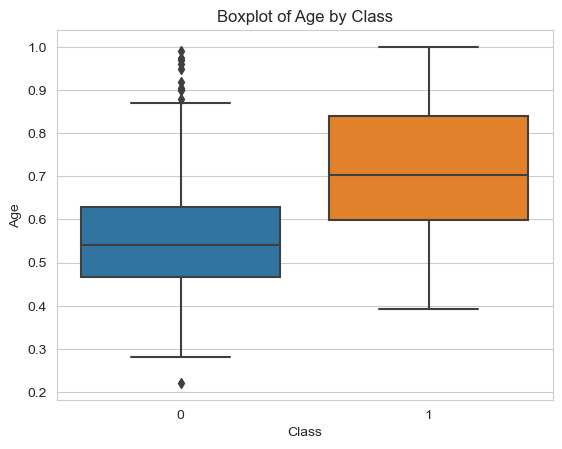

In [88]:
#Box plot single
sns.boxplot(x='Class', y='Glucose_concentration', data=df)

plt.title('Boxplot of Age by Class')  # Set the title of the plot
plt.xlabel('Class')  # Set the label for x-axis
plt.ylabel('Age')  # Set the label for y-axis
plt.show()  #


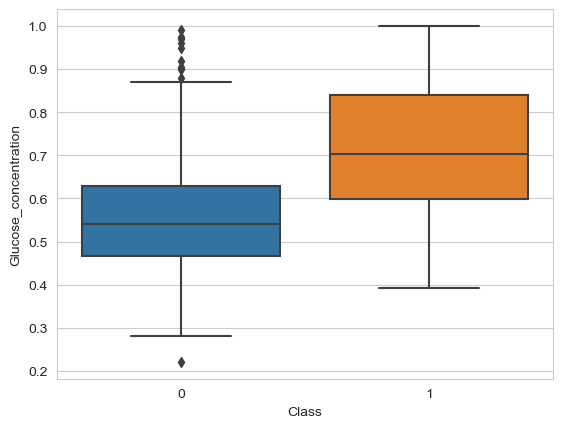

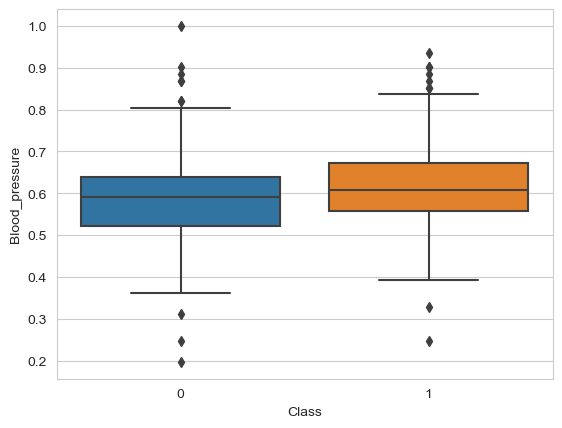

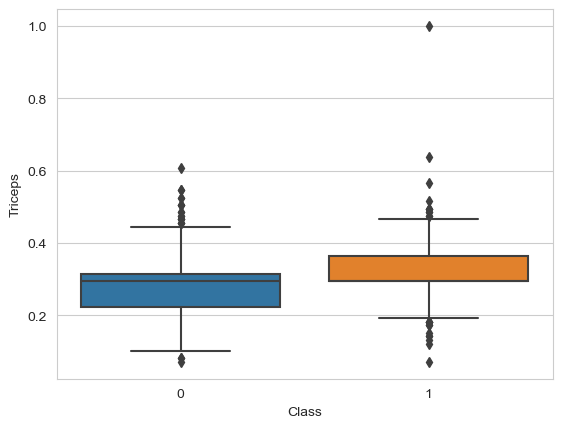

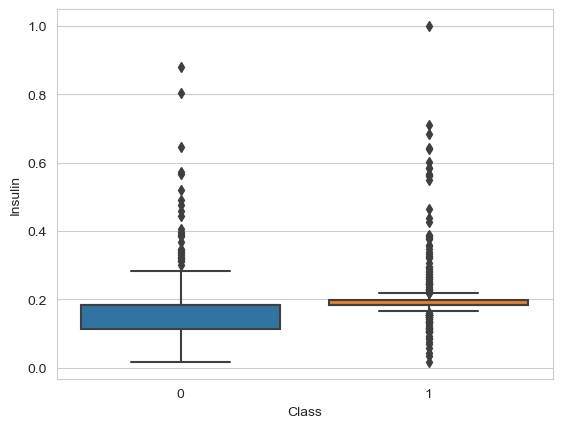

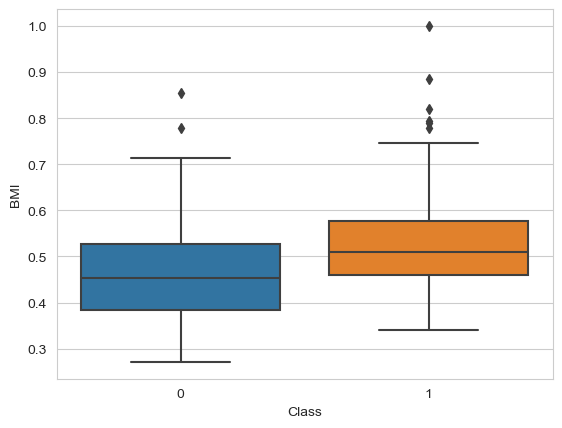

In [89]:
# Box plot multiple

def plot_box(data, cols, col_x = 'Class'):
     for col in cols:
            sns.set_style('whitegrid')
            sns.boxplot(x = col_x, y= col, data=data)
            plt.xlabel(col_x) # Set text for the x axis
            plt.ylabel(col)# Set text for y axis
            plt.show()

            
            
num_cols = ['Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI']
plot_box(df, num_cols)

In [92]:
X=df[num_cols]
y=df['Class']

In [95]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [97]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 10), 'criterion':['entropy','gini']}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)
tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [101]:
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7165354330708661
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       168
           1       0.69      0.29      0.41        86

    accuracy                           0.72       254
   macro avg       0.71      0.61      0.61       254
weighted avg       0.71      0.72      0.68       254

